In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("titanic_train.csv", index_col='PassengerId')
test = pd.read_csv("titanic_test.csv", index_col='PassengerId')

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
106,0,3,"Mionoff, Mr. Stoytcho",male,28.00,0,0,349207,7.8958,NaN,S
836,1,1,"Compton, Miss. Sara Rebecca",female,39.00,1,1,PC 17756,83.1583,E49,C
192,0,2,"Carbines, Mr. William",male,19.00,0,0,28424,13.0000,NaN,S
567,0,3,"Stoytcheff, Mr. Ilia",male,19.00,0,0,349205,7.8958,NaN,S
306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S


In [4]:
titanic_Data= pd.concat([train, test], ignore_index=False)
rows,columns = titanic_Data.shape
print("num of rows in data :",rows)
print("the number of column in the data:",columns)

num of rows in data : 1309
the number of column in the data: 11


In [5]:
titanic_Data.info()
train.describe().T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<AxesSubplot:ylabel='Sex'>

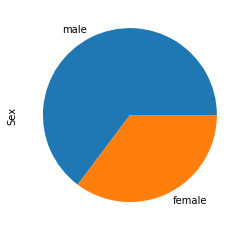

In [6]:
train.Sex.value_counts().plot(kind='pie')

<AxesSubplot:xlabel='Survived', ylabel='count'>

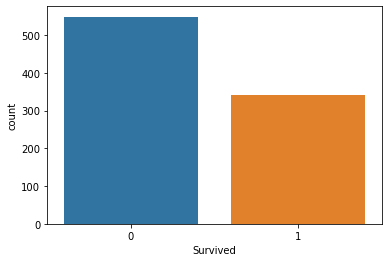

In [7]:
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

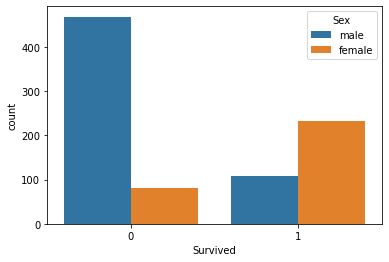

In [8]:
sns.countplot(x='Survived',data=train,hue='Sex')

In [9]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [10]:
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


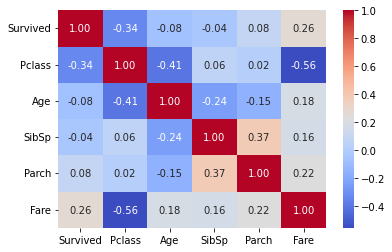

In [11]:
relation=titanic_Data.loc[:,['Survived','Pclass','Age','SibSp','Parch','Fare']]
corr=relation.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()
#correlation is modest

<AxesSubplot:ylabel='PassengerId'>

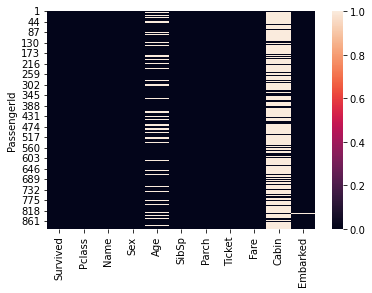

In [12]:
sns.heatmap(train.isna())

<AxesSubplot:>

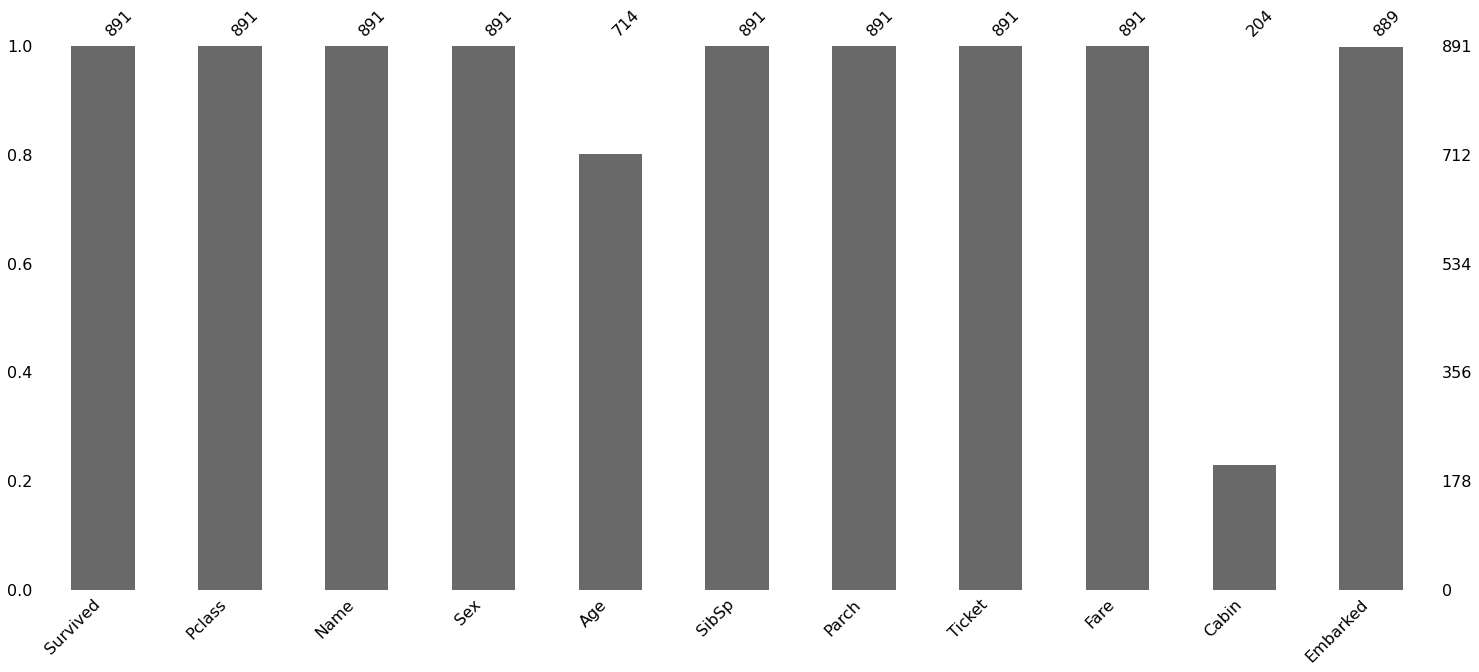

In [13]:
missing_values_train = msno.bar(train)
missing_values_train

<AxesSubplot:>

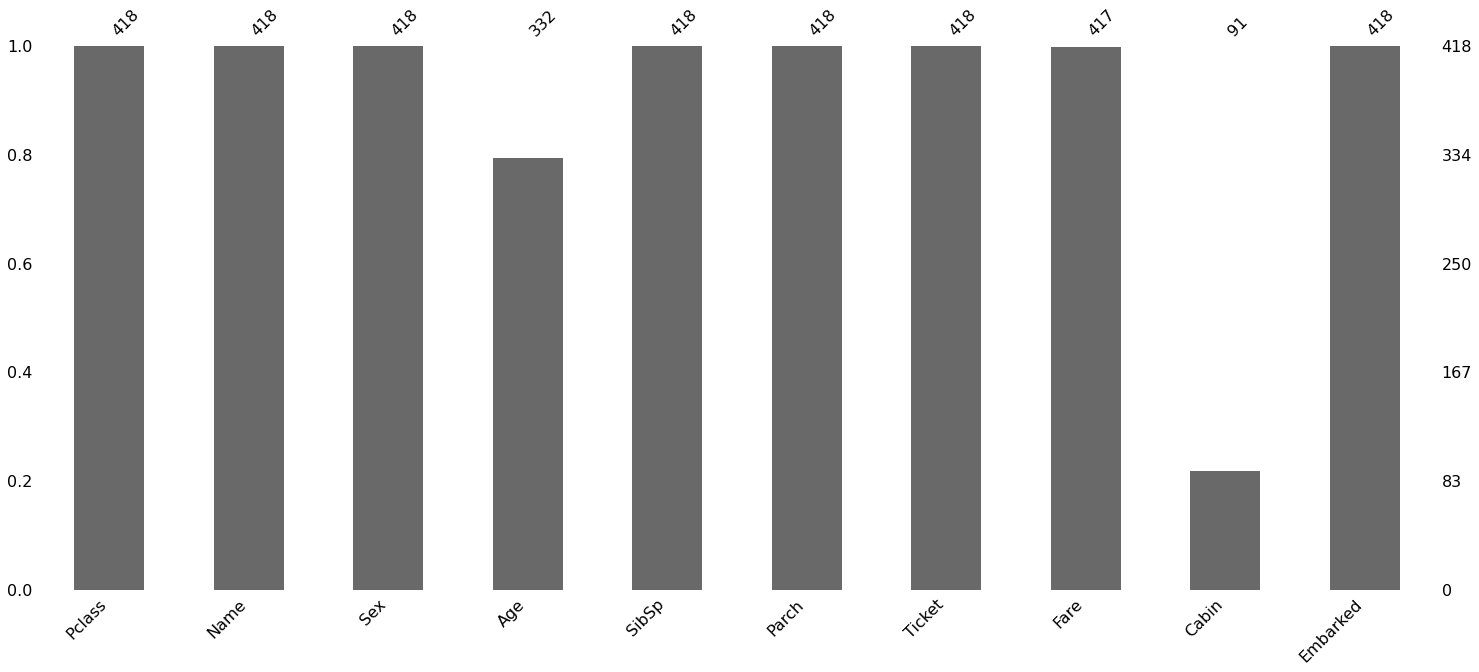

In [14]:
missing_values_test = msno.bar(test)
missing_values_test

In [15]:
imputer = SimpleImputer(strategy='mean')

data = [train, test]
for dataset in data:
    dataset['Age'] = imputer.fit_transform(dataset['Age'].values.reshape(-1, 1))
    dataset.dropna(axis=0,subset='Embarked',inplace=True)
    dataset['Fare'] = (dataset['Fare'].fillna(0)).astype(int)

In [16]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

<AxesSubplot:ylabel='PassengerId'>

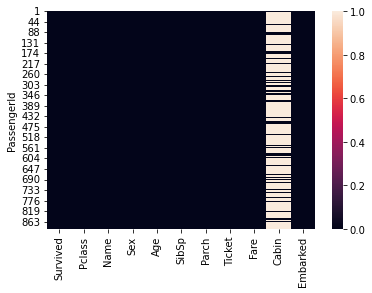

In [17]:
sns.heatmap(train.isna())


In [18]:
for dataset in data:
    dataset['isAlone'] = (dataset['SibSp'] + dataset['Parch'] == 0).astype(int)
    dataset['isFamily'] = (dataset['SibSp'] + dataset['Parch'] > 0).astype(int)

In [19]:
for dataset in data:

    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

    dataset['FarePerPerson'] = (dataset['Fare'] / dataset['FamilySize']).astype(int)

In [20]:
for dataset in data:
     dataset['AgeGroup'] = pd.cut(dataset['Age'], bins=[0, 12, 18, 60, np.inf],
                                  labels=['Child', 'Teenager', 'Adult', 'Senior'])

In [21]:
for dataset in data:
    # Extract Title from the Name column
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # Consolidate rare titles into a single 'Rare' category
    rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
    dataset['Title'] = dataset['Title'].replace(rare_titles, 'Rare')
    
    # Replace 'Mlle' and 'Ms' with 'Miss', and 'Mme' with 'Mrs'
    dataset['Title'] = dataset['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})


In [22]:
columns_to_drop = ['Name', 'Ticket', 'Cabin']

for dataset in data:
    dataset.drop(columns=columns_to_drop, inplace=True)

In [23]:
#gender=pd.get_dummies(train_data['Sex'],drop_first=True)
#train_data['Gender']=gender
#embarked = pd.get_dummies(train_data['Embarked'], drop_first = True)
#train_data = pd.concat([train_data, embarked], axis='columns')
#train_data.drop(['Name','Ticket','Embarked'],axis=1,inplace=True)

In [24]:
def category_mapping(data):
    
    mapping = {
    'Sex': {'male': 0, 'female': 1},
    'Embarked': {'S': 0, 'C': 1, 'Q': 2},
    'Title': {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5},
    'AgeGroup': {'Child': 1, 'Teenager': 2, 'Adult': 3, 'Senior': 4}   
    }

    for df in data:
        for feature, value in mapping.items():
            df[feature] = df[feature].map(value)

    return data

data = category_mapping(data)

In [25]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone,isFamily,FamilySize,FarePerPerson,AgeGroup,Title
PassengerId,,,,,,,,,,,,,,
1,0,3,0,22.0,1,0,7,0,0,1,2,3,3,1
2,1,1,1,38.0,1,0,71,1,0,1,2,35,3,3
3,1,3,1,26.0,0,0,7,0,1,0,1,7,3,2
4,1,1,1,35.0,1,0,53,0,0,1,2,26,3,3
5,0,3,0,35.0,0,0,8,0,1,0,1,8,3,1


In [26]:
scaler = StandardScaler()
for i in range(len(data)):
    data[i][:] = scaler.fit_transform(data[i])

In [27]:
X = train.drop(columns='Survived')
y = train['Survived'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
classifiers = [RandomForestClassifier, DecisionTreeClassifier, SVC, LogisticRegression, KNeighborsClassifier]
classifiers_names = ['RandomForestClassifier', 'DecisionTreeClassifier', 'SVC', 'LogisticRegression',
                     'KNeighborsClassifier']
classifiers_scores = []

for classifier, name in zip(classifiers, classifiers_names):
    kfold = KFold(n_splits=10, random_state=25, shuffle=True)
    model = classifier()
    cv_score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    classifiers_scores.append(cv_score.mean())

# create a dataframe of classifiers and their scores
classifiers_df = pd.DataFrame({'Classifier': classifiers_names, 'Accuracy score': classifiers_scores})
classifiers_df

,Classifier,Accuracy score
0,RandomForestClassifier,0.809831
1,DecisionTreeClassifier,0.789632
2,SVC,0.823417
3,LogisticRegression,0.811032
4,KNeighborsClassifier,0.802017


Name: RandomForestClassifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       167
           1       0.72      0.67      0.69       100

    accuracy                           0.78       267
   macro avg       0.77      0.76      0.76       267
weighted avg       0.78      0.78      0.78       267




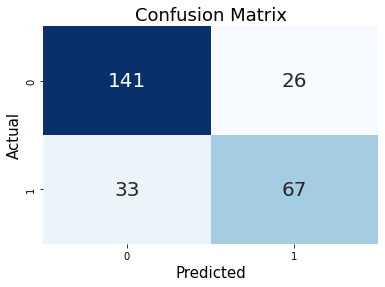

Accuracy Score: 0.7790262172284644

Name: DecisionTreeClassifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       167
           1       0.74      0.67      0.70       100

    accuracy                           0.79       267
   macro avg       0.77      0.76      0.77       267
weighted avg       0.78      0.79      0.78       267




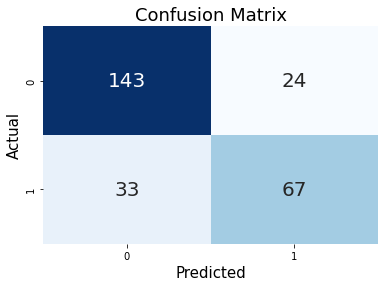

Accuracy Score: 0.7865168539325843

Name: SVC:
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       167
           1       0.76      0.72      0.74       100

    accuracy                           0.81       267
   macro avg       0.80      0.79      0.79       267
weighted avg       0.81      0.81      0.81       267




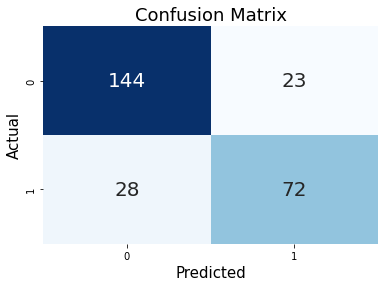

Accuracy Score: 0.8089887640449438

Name: LogisticRegression:
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       167
           1       0.71      0.75      0.73       100

    accuracy                           0.79       267
   macro avg       0.78      0.79      0.78       267
weighted avg       0.80      0.79      0.79       267




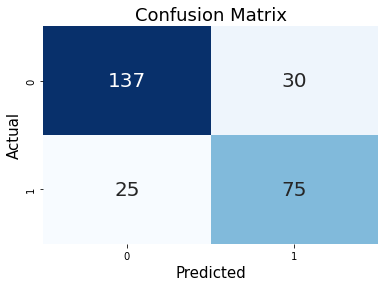

Accuracy Score: 0.7940074906367042

Name: KNeighborsClassifier:
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       167
           1       0.74      0.69      0.72       100

    accuracy                           0.79       267
   macro avg       0.78      0.77      0.78       267
weighted avg       0.79      0.79      0.79       267




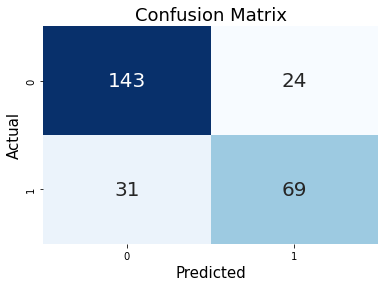

Accuracy Score: 0.7940074906367042



In [56]:
for classifier, name in zip(classifiers, classifiers_names):
    model = classifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    print("\033[1mName:\033[0m {}:".format(name))
    print(f"Classification Report:\n{report}\n")
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',cbar=False, annot_kws={'size': 20})
    plt.xlabel('Predicted', size=15)
    plt.ylabel('Actual', size=15)
    plt.title('Confusion Matrix', size=18)
    plt.show()
    
    print(f"Accuracy Score: {accuracy}\n")

In [59]:
svm = SVC()
svm.fit(X,y)

test_predictions = svm.predict(test)

In [60]:
test_predictions = pd.DataFrame({'Survived' : test_predictions})

In [61]:
test_id = pd.read_csv("titanic_test.csv")['PassengerId']

In [62]:
submission_df = pd.concat([test_id, test_predictions], axis = 1)

In [63]:
submission_df.to_csv('SVC.csv', index=False)